In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# get data

In [16]:
#cvd_df = pd.read_csv("CVD_cleaned.csv")
cvd_adj = pd.read_csv("cvd_adj.csv")
cvd_cut = pd.read_csv("cvd_manually_cut.csv")
cvd_smotenc = pd.read_csv("cvd_smotenc.csv", compression="gzip")# de-compress


In [17]:
#cvd_df.info()

In [14]:
cvd_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 38 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          308854 non-null  float64
 1   Weight_(kg)                                          308854 non-null  float64
 2   BMI                                                  308854 non-null  float64
 3   Alcohol_Consumption                                  308854 non-null  float64
 4   Fruit_Consumption                                    308854 non-null  float64
 5   Green_Vegetables_Consumption                         308854 non-null  float64
 6   FriedPotato_Consumption                              308854 non-null  float64
 7   General_Health_Fair                                  308854 non-null  bool   
 8   General_Health_Good                                  3

In [10]:
cvd_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62427 entries, 0 to 62426
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Height_(cm)                                          62427 non-null  float64
 1   Weight_(kg)                                          62427 non-null  float64
 2   BMI                                                  62427 non-null  float64
 3   Alcohol_Consumption                                  62427 non-null  float64
 4   Fruit_Consumption                                    62427 non-null  float64
 5   Green_Vegetables_Consumption                         62427 non-null  float64
 6   FriedPotato_Consumption                              62427 non-null  float64
 7   General_Health_Fair                                  62427 non-null  bool   
 8   General_Health_Good                                  62427 non-nul

In [13]:
cvd_smotenc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567766 entries, 0 to 567765
Data columns (total 38 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          567766 non-null  float64
 1   Weight_(kg)                                          567766 non-null  float64
 2   BMI                                                  567766 non-null  float64
 3   Alcohol_Consumption                                  567766 non-null  float64
 4   Fruit_Consumption                                    567766 non-null  float64
 5   Green_Vegetables_Consumption                         567766 non-null  float64
 6   FriedPotato_Consumption                              567766 non-null  float64
 7   General_Health_Fair                                  567766 non-null  bool   
 8   General_Health_Good                                  5

# dataset performance on LR

In [18]:
def create_trainset(df):
    X = df.drop("Heart_Disease_Yes", axis=1)
    y = df["Heart_Disease_Yes"]
    randomstate = 42
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train,X_test,y_train,y_test

In [22]:
X_train_adj,X_test_adj,y_train_adj,y_test_adj = create_trainset(cvd_adj)
X_train_cut,X_test_cut,y_train_cut,y_test_cut = create_trainset(cvd_cut)
X_train_smotenc,X_test_smotenc,y_train_smotenc,y_test_smotenc = create_trainset(cvd_smotenc)

In [29]:
#LR fit func

def LR_fit(x_train, x_test, y_train):
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred = lr.predict(x_test)
    
    return lr, lr_pred
    

In [30]:
lr_adj, lr_adj_pred = LR_fit(X_train_adj,X_test_adj,y_train_adj)
lr_cut, lr_cut_pred = LR_fit(X_train_cut,X_test_cut,y_train_cut)
lr_smotenc, lr_smotenc_pred = LR_fit(X_train_smotenc,X_test_smotenc,y_train_smotenc)

c:\Users\serig\OneDrive\vikrigt\skola\ds23_projektkurs-main\git\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\serig\OneDrive\vikrigt\skola\ds23_projektkurs-main\git\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [38]:
def result_report(y_test,y_test_pred):
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.99      0.96     56774
        True       0.49      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771



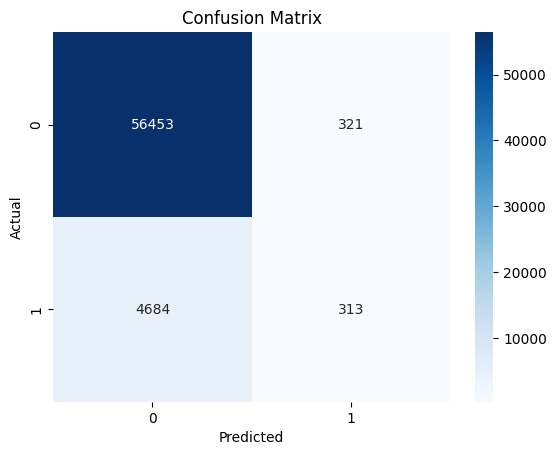

Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.83      0.79      7395
        True       0.70      0.60      0.65      5091

    accuracy                           0.73     12486
   macro avg       0.73      0.71      0.72     12486
weighted avg       0.73      0.73      0.73     12486



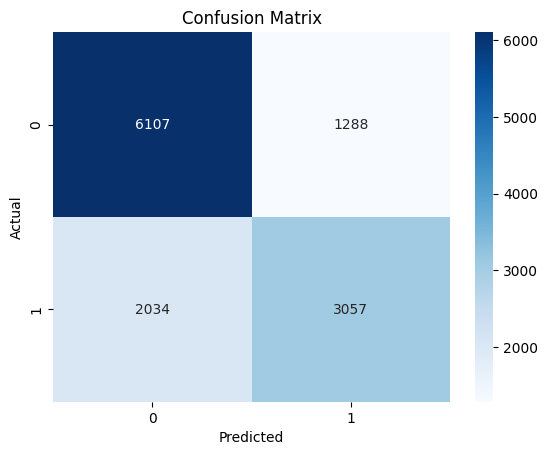

Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.74      0.76     56701
        True       0.75      0.78      0.77     56853

    accuracy                           0.76    113554
   macro avg       0.76      0.76      0.76    113554
weighted avg       0.76      0.76      0.76    113554



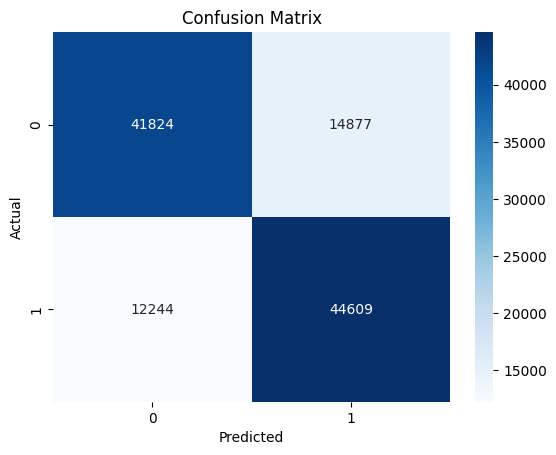

In [39]:
result_report(y_test_adj, lr_adj_pred)
result_report(y_test_cut, lr_cut_pred)
result_report(y_test_smotenc, lr_smotenc_pred)